<a href="https://colab.research.google.com/github/ounospanas/AIDL_A_02/blob/main/notebooks/AIDL_A02_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load Fashion MNIST dataset for clothing classification
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

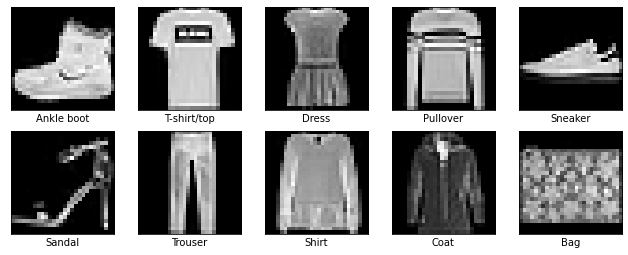

In [3]:
#visualize some data
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
selected = [0,1,3,5,6,8,16,18,19,23]
plt.figure(figsize=(11, 11))
for i, s in enumerate(selected):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    #img = plt.imread(x_train[s])
    plt.imshow(x_train[s], cmap='gray')
    plt.xlabel(classes[y_train[s]],)

In [4]:
# normalize data by dividing with the macx pixel value: 255
x_train = x_train.reshape(x_train.shape[0],-1)/255
x_test = x_test.reshape(x_test.shape[0],-1)/255

# Binary Classification
### We turn the problem of clothing classification into binary (two classes i.e., t-shirts and ankle boots) in order to make it more simple

In [5]:
# select only t-shirts and ankle boots
shirt_train = np.where(y_train==0)
dress_train = np.where(y_train==3)

shirt_test = np.where(y_test==0)
dress_test = np.where(y_test==3)

In [6]:
# concatenate them
x_train_s = x_train[shirt_train]
y_train_s = y_train[shirt_train]

x_test_s = x_test[shirt_test]
y_test_s = y_test[shirt_test]

x_train_d = x_train[dress_train]
y_train_d = y_train[dress_train]

x_test_d = x_test[dress_test]
y_test_d = y_test[dress_test]

x_train_binary = np.concatenate([x_train_s, x_train_d])
x_test_binary = np.concatenate([x_test_s, x_test_d])

y_train_binary = np.concatenate([y_train_s, np.ones_like(y_train_d)])
y_test_binary = np.concatenate([y_test_s, np.ones_like(y_test_d)])

### Sklearn approach

In [7]:
# train stohastic gradient descent
from sklearn.linear_model import SGDClassifier
lr = SGDClassifier(alpha=0.0001)
lr.fit(x_train_binary, y_train_binary)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
# test result
np.mean(lr.predict(x_test_binary)==y_test_binary)

0.928

# Binary Logistic Regression (Custom)

Compute the sigmoid function:
$$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$$

In [9]:
def sigmoid(z):
    """
    Compute sigmoid function.
    z : the product theta.T * x + b
    Returns
    -------
    g : The sigmoid function.
    """
    # TO DO (Hint, check np.exp)
    a = None
    # ======
    return a

In [13]:
# check sigmoid function
np.round(sigmoid(np.asarray([1,2,3])),4) == np.array([0.7311, 0.8808, 0.9526])

array([ True,  True,  True])

In [15]:
def init_params(size):
  # set random seed to 0
  np.random.seed(0)
  # TO DO
  # init random params in the range (0,1) with the given size and multiply it with 0.1
  theta = None# TO DO set random small values
  return theta

In [16]:
# check init params
np.round(init_params(2),4) == np.array([0.0549, 0.0715])

array([ True,  True])

Calculate the cost function: $$J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$$

In [18]:
def costFunction(X, y, w, b, m, a):
    """
    Computes cost for linear regression. 
    X : feature vector, shape (m x n+1)
    y : labels (i.e., dog or cat), shape (m, )
    w : parameters for the linear regression, shape (n+1, )
    m: data legth

    returns
    -------
    J : value of cost function.
    """

    # TO DO !!! Hint compute sigmoid first, (i.e., a variable) and then J for convenience. Check the formula shown above
    J = None
    #####
  
    return J

In [19]:
# check cost function
w, b, X, y = np.array([[2],[3]]), 1.5, np.array([[0,1],[2,3]]), np.array([[0,1]])
m = X.shape[0]
a = sigmoid(np.dot(w.T, X) + b)

assert np.round(costFunction(X, y, w, b, m, a), 4) == 3.7503 #should produce no assertion error

Calculate the derivatives: $$ \frac{\partial J}{\partial W} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$
The first can be described analytically by this equation:
$$ \frac{\partial J}{\partial w_j} = \frac{1}{m}\sum_{i=1}^mx^{(i)}_j(a^{(i)}_j-y^{(i)})^T$$

In [24]:
def derivatives(X, y, m, A):
  # TO DO, calculate dw, db using the above formula
  dw = None
  db = None
  return dw, db

In [25]:
# check derivative function
w, b, X, y = np.array([[2],[3]]), 1.5, np.array([[0,1],[2,3]]), np.array([[0,1]])
m = X.shape[0]
a = sigmoid(np.dot(w.T, X) + b)

dw, db = derivatives(X,y,m,a)
print(np.round(dw,8) == np.array([[-0.00000186],[0.99944163]]))
print(np.round(b,4)==1.5)

[[ True]
 [ True]]
True


$$ w_j := w_j - \lambda dw_j $$
$$ b := b - \lambda db $$

In [26]:
# update parameters for optimization
def update(w, b, dw, db):
  w = w - learning_rate*dw
  b = b - learning_rate*db
  return w, b

In [27]:
# train algorithm
costs = []
learning_rate = 0.01
epochs = 3000   


w = init_params(x_train_binary.shape[1])
b = init_params(1)
for i in range(epochs):
    
    #TO DO. 
    # 1. compute Z
    # 2. compute A (sigmoid)
    # 3. compute cost J and save it to costs
    # 4. compute dw, db
    # 5. update
    z = None
    a = None
    cost = None
    dw, db = None
    w, b = None

    ######

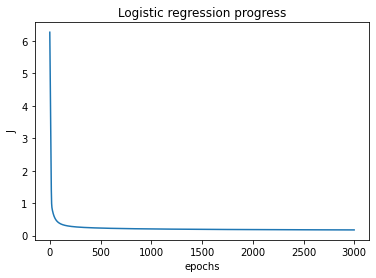

In [28]:
plt.plot(costs)
plt.title ("Logistic regression progress")
plt.xlabel("epochs")
plt.ylabel("J")
plt.show()

In [29]:
train_acc = np.mean(np.round(sigmoid(np.dot(w.T, x_train_binary.T)))==y_train_binary)
test_acc = np.mean(np.round(sigmoid(np.dot(w.T, x_test_binary.T)))==y_test_binary)

In [30]:
print("Train acc: {}".format(train_acc)) #should be around 93.1%
print("Test acc: {}".format(test_acc)) #should be around 92.8%

Train acc: 0.9310833333333334
Test acc: 0.928


# Multiclass Logistic Regression (sklearn)

In [31]:
# train a subsample only (due to RAM, response time). So we pick only the first 3,000 examples
x_train = x_train[:3000]
y_train = y_train[:3000]

In [34]:
# train stohastic gradient descent
from sklearn.linear_model import SGDClassifier
lr = SGDClassifier(alpha=0.0001)
lr.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
# test result
np.mean(lr.predict(x_test)==y_test)

0.7573

# Multiclass Logistic Regression (Custom)

TO DO 
1. init_params should have $w$ with dimensions number_of_features x number_of_classes, so 784x10 
2. compute softmax instead of sigmoid \begin{eqnarray*} P(Y=i|x, w,b) =\frac {e^{w_i x + b_i}}{\sum_j e^{w_j x + b_j}} \\ \end{eqnarray*}
3. multiclass cost function (negative log-likelihood)
\begin{eqnarray*} -\sum_{c=1}^Ky_{x,c}\log(p_{x,c}) \\ \end{eqnarray*}, where: $K$ is the number of classes (T-shirt, boots, etc),  $y$ is the binary indicator (0 or 1) if class label $c$ is the correct class for example $x$, and $p$ is the predicted probability for $x$ is of class $c$.

In [37]:
def init_params(size, classes):
  # set random seed to 0
  np.random.seed(0)
  # TO DO
  # init random params (0,1) and multiply it with 0.1
  w = None # TO DO set random small values
  b = None # TO DO set random small values
  return w, b

In [38]:
# softmax function for multi class logistic regression
def softmax(X, w, b):
   # TO DO
   z = None
   exp = None
   a = None
   return a.T

In [39]:
def multiCostFunction(X, y, w, b, m, a):
    """
    Computes cost for linear regression. 
    X : feature vector, shape (m x n+1)
    y : labels (i.e., dog or cat), shape (m, )
    w : parameters for the linear regression, shape (n+1, )
    m: data legth

    returns
    -------
    J : value of cost function.
    """

    # TO DO !!! Hint for computational reasons multiply log(a) only with the correct class index (e.g., where y = 1)
    # all the rest are zeros
    J = None
    #####
  
    return J

In [40]:
def derivatives(X, y, m, A):
  # TO DO, calculate dw, db
  dw = None
  db = None
  return dw, db

In [41]:
# update parameters for optimization
def update(w, b, dw, db):
  w = w - learning_rate*dw
  b = b - learning_rate*db
  return w, b

In [42]:
# convert y to one-hot matrix
Y_train = tf.keras.utils.to_categorical(y_train)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [44]:
# train algorithm for 10,000 epoch. It will take ~2 minutes
costs = []
learning_rate = 0.001
epochs = 10000


w, b = init_params(x_train.shape[1], 10)
for i in range(epochs):
    
    # 1. compute Z
    # 2. compute A (softmax)
    # 3. compute cost J and save it
    # 4. compute dw, db
    # 5. update weights
    
    z = None
    a = None
    cost = None
    dw, db = None
    w, b = None
    
    if i%100==0:
      print('epoch {} with test_accuracy {}'.format(i,np.mean(np.argmax(softmax(x_test,w,b),1)==y_test))) #it should be close to 74.82%

    ######

epoch 0 with test_accuracy 0.1204
epoch 100 with test_accuracy 0.302
epoch 200 with test_accuracy 0.4216
epoch 300 with test_accuracy 0.5106
epoch 400 with test_accuracy 0.5564
epoch 500 with test_accuracy 0.5881
epoch 600 with test_accuracy 0.607
epoch 700 with test_accuracy 0.6204
epoch 800 with test_accuracy 0.632
epoch 900 with test_accuracy 0.6401
epoch 1000 with test_accuracy 0.6459
epoch 1100 with test_accuracy 0.6482
epoch 1200 with test_accuracy 0.6507
epoch 1300 with test_accuracy 0.6529
epoch 1400 with test_accuracy 0.6553
epoch 1500 with test_accuracy 0.6577
epoch 1600 with test_accuracy 0.6597
epoch 1700 with test_accuracy 0.6609
epoch 1800 with test_accuracy 0.6621
epoch 1900 with test_accuracy 0.6642
epoch 2000 with test_accuracy 0.6666
epoch 2100 with test_accuracy 0.6681
epoch 2200 with test_accuracy 0.6688
epoch 2300 with test_accuracy 0.6712
epoch 2400 with test_accuracy 0.6743
epoch 2500 with test_accuracy 0.6751
epoch 2600 with test_accuracy 0.6772
epoch 2700 with 